In [88]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings ("ignore")

import matplotlib.pyplot as plt

import os
os.chdir("C:/Users/odela/Downloads")

In [209]:
drugs=pd.read_csv("drugs (1).csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [116]:
feature_cols= ["Age","Sex","BP", "Cholesterol", "Na_to_K"]
x= drugs[feature_cols].values
y= drugs.Drug

In [118]:
y.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [120]:
from sklearn import preprocessing

Cod_Sex= preprocessing.LabelEncoder()
Cod_Sex.fit(["M", "F"])
x[:,1]= Cod_Sex.transform(x[:,1])

Cod_BP= preprocessing.LabelEncoder()
Cod_BP.fit(["LOW","NORMAL","HIGH"])
x[:,2]= Cod_BP.transform(x[:,2])

Cod_Cholesterol= preprocessing.LabelEncoder()
Cod_Cholesterol.fit(["NORMAL", "HIGH"])
x[:,3]= Cod_Cholesterol.transform(x[:,3])

In [122]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.25, random_state=1)

In [142]:
def plot_feature_importance(df,model):
    n_features= feature_cols
    plt.bar(n_features, model.feature_importances_, align="center") 
    plt.xlabel( "Importancia de las variables")
    plt.ylabel("Características")
    plt.show()

# Random Forest

In [134]:
rf= RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

1.0

In [140]:
# Estadísticas de desempeño generales

from sklearn.metrics import  classification_report
y_pred= rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



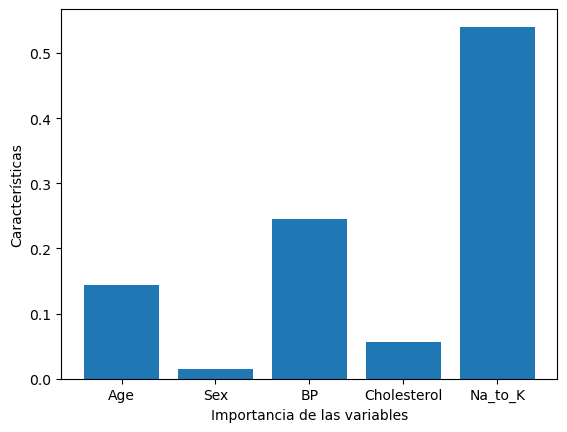

In [144]:
plot_feature_importance(drugs, rf)

# Gradient boosted trees

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
gbt= GradientBoostingClassifier(n_estimators=100, random_state=1, max_depth=5)
gbt.fit(x_train, y_train)
gbt.score(x_test, y_test)

1.0

In [155]:
y_pred2= gbt.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



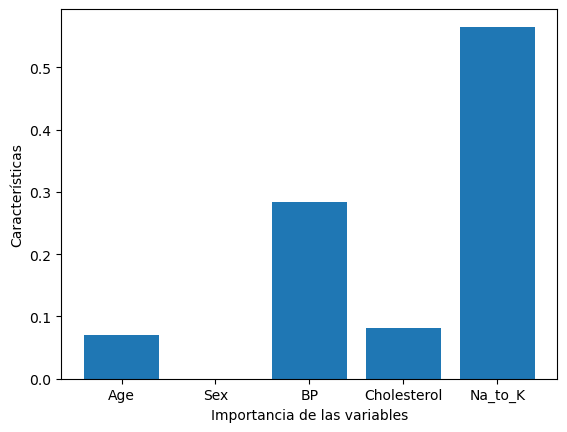

In [157]:
plot_feature_importance(drugs, gbt)

# AdaBoost

In [160]:
from sklearn.ensemble import AdaBoostClassifier

In [195]:
ab= AdaBoostClassifier(n_estimators=100, learning_rate=1)
ab.fit(x_test,y_test)
ab.score( x_test, y_test)

0.84

In [197]:
y_pred3= ab.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         4
       drugB       0.56      1.00      0.71         5
       drugC       0.00      0.00      0.00         4
       drugX       0.80      1.00      0.89        16
       drugY       1.00      1.00      1.00        21

    accuracy                           0.84        50
   macro avg       0.47      0.60      0.52        50
weighted avg       0.73      0.84      0.78        50



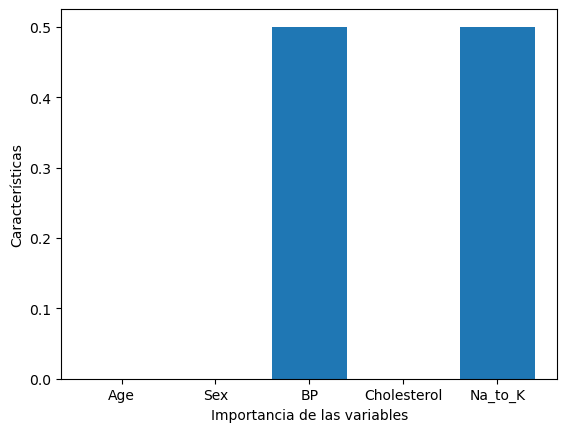

In [170]:
plot_feature_importance(drugs, ab)

# Ada Boost SVM

In [199]:
from sklearn.svm import SVC
svc= SVC(probability=True, kernel= "linear")

In [203]:
absvm= AdaBoostClassifier(n_estimators= 30, estimator=svc, learning_rate=1)
absvm.fit(x_test, y_test)
absvm.score(x_test, y_test)

0.72

In [205]:
y_pred4= absvm.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         4
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         4
       drugX       0.54      0.94      0.68        16
       drugY       0.95      1.00      0.98        21

    accuracy                           0.72        50
   macro avg       0.30      0.39      0.33        50
weighted avg       0.57      0.72      0.63        50

